# Evaluation

In [1]:
import pandas as pd

from src.classes.Syracuse import Syracuse, Method
from src.helpers.plot_helper import PlotHelper

In [2]:
def evaluate_syracuse(n: int) -> pd.DataFrame:
    data = []

    for num in range(1, n + 1):
        suite = Syracuse.generate_suite(num)
        compressed_suite = Syracuse.generate_suite(num, Method.COMPRESSED)

        data.append({
            "initial": num,
            "fly_time": suite.fly_time,
            "compressed_fly_time": compressed_suite.fly_time,
            "alt_fly_time": suite.alt_fly_time,
            "compressed_alt_fly_time": compressed_suite.alt_fly_time,
            "max_alt": suite.max_alt,
            "compressed_max_alt": compressed_suite.max_alt,
        })

    return pd.DataFrame(data)

In [3]:
df = evaluate_syracuse(100)

In [4]:
df.head(10)

,initial,fly_time,compressed_fly_time,alt_fly_time,compressed_alt_fly_time,max_alt,compressed_max_alt
0,1,0,0,0,0,1,1
1,2,1,1,1,1,2,2
2,3,7,5,6,4,16,8
3,4,2,2,1,1,4,4
4,5,5,4,3,2,16,8
5,6,8,6,1,1,16,8
6,7,16,11,11,7,52,26
7,8,3,3,1,1,8,8
8,9,19,13,3,2,52,26
9,10,6,5,1,1,16,10


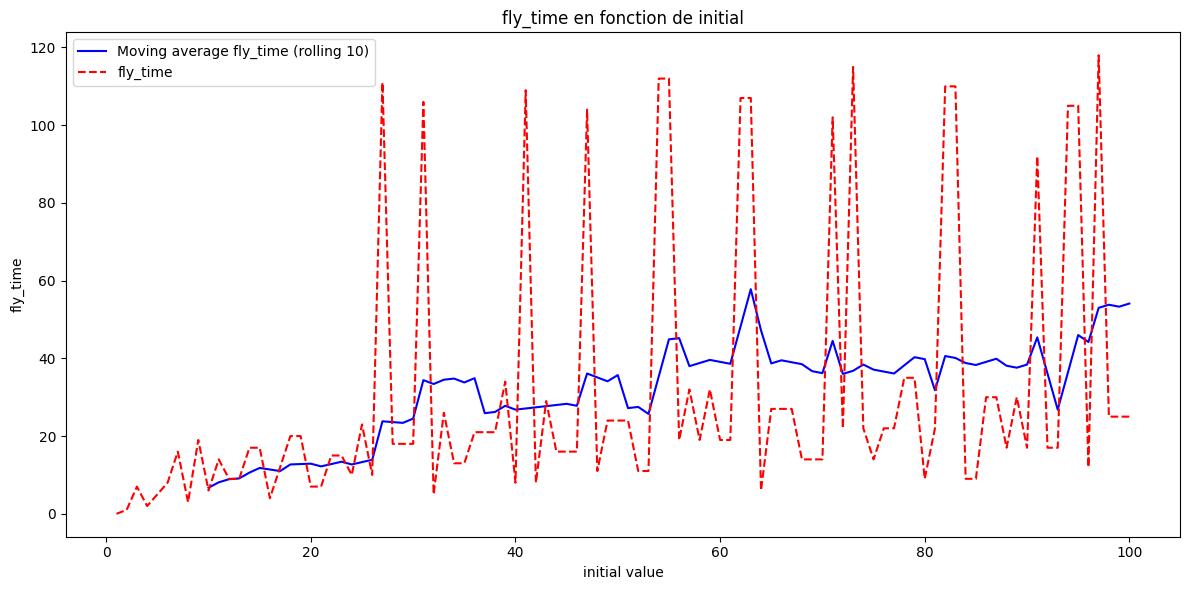

In [5]:
PlotHelper.plot_with_rolling_average(df, 'initial', 'fly_time')

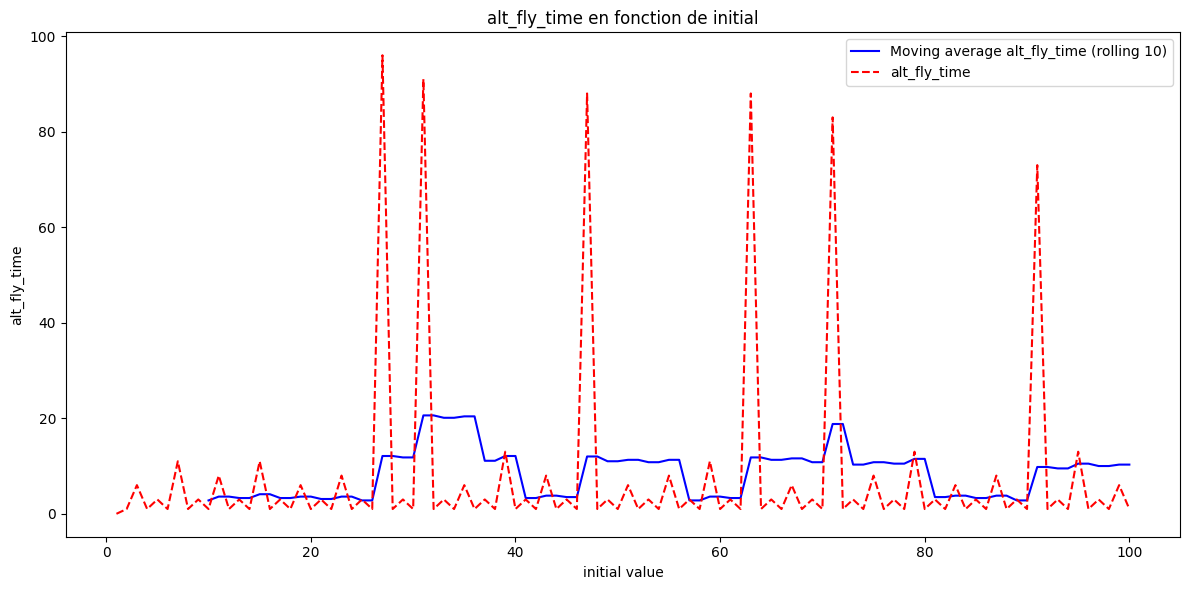

In [6]:
PlotHelper.plot_with_rolling_average(df, 'initial', 'alt_fly_time')

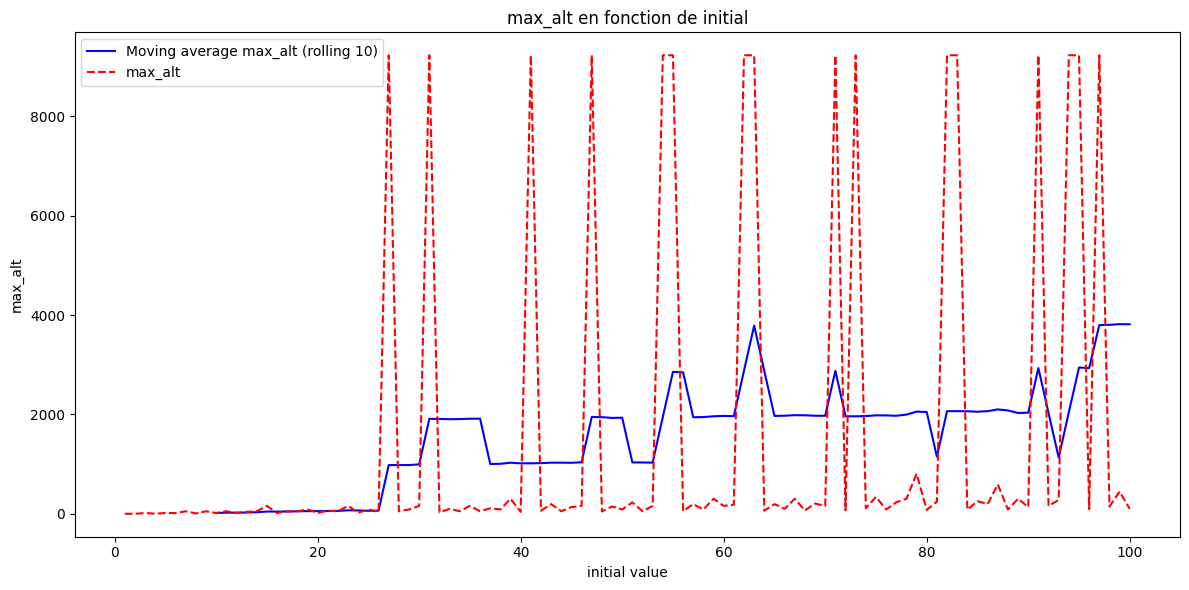

In [7]:
PlotHelper.plot_with_rolling_average(df, 'initial', 'max_alt')